In [17]:
from logicqubit.logic import *
from math import *
import random
import matplotlib.pyplot as plt

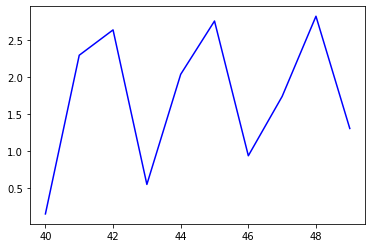

In [18]:
def measurement(type_A, type_B, angle):
    logicQuBit = LogicQuBit(2)
    
    gates = Gates()
    ZZ = gates.Z().kron(gates.Z())
    
    A = Qubit()
    B = Qubit()

    # generate entangled state |01>+|10>
    A.H()
    B.CNOT(A)
    B.X()
    B.Z()

    # Alice choose the measurement
    if "a'" == type_A:
        A.H()

    # Bob choose the measurement
    if "b" == type_B:
        B.RY(-angle)
    elif "b'" == type_B:
        B.RY(angle)
        
    psi = logicQuBit.getPsi()
    value = (psi.adjoint()*ZZ*psi).get()[0]
    return value

step = 1 
angles = np.arange(40, 50, step)
result = []
for angle in angles:
    values = {}
    values["ab"] = measurement("a","b",angle)
    values["a'b"] = measurement("a'","b",angle)
    values["ab'"] = measurement("a","b'",angle)
    values["a'b'"] = measurement("a'","b'",angle)
    inequality = values["ab"] + values["a'b"] + values["ab'"] - values["a'b'"]
    inequality = sqrt(inequality.real * inequality.real)
    result.append(inequality)
    
plt.plot(angles, result, color='blue')
plt.show()

In [19]:
# |<C>| = |<a.b> + <a'.b> + <a.b'> - <a'.b'>| <= 2
def bell_inequality(A, B):
    direction = {"ab":0, "a'b":0, "ab'":0, "a'b'":0}
    count = {"ab":0, "a'b":0, "ab'":0, "a'b'":0}
    
    for a,b in zip(A,B):
        if a[0]=="a" and b[0]=="b":
            direction["ab"] += a[1]*b[1]
            count["ab"] += 1
        elif a[0]=="a'" and b[0]=="b":
            direction["a'b"] += a[1]*b[1]
            count["a'b"] += 1
        elif a[0]=="a" and b[0]=="b'":
            direction["ab'"] += a[1]*b[1]
            count["ab'"] += 1
        elif a[0]=="a'" and b[0]=="b'":
            direction["a'b'"] += a[1]*b[1]
            count["a'b'"] += 1

    direction["ab"] /= count["ab"]
    direction["a'b"] /= count["a'b"]
    direction["ab'"] /= count["ab'"]
    direction["a'b'"] /= count["a'b'"]
    inequality = direction["ab"] + direction["a'b"] + direction["ab'"] - direction["a'b'"]
    inequality = sqrt(inequality * inequality)
    return inequality

def measurements(eva=False, attempts=10, angle=45):
    to_minus_one = lambda x: -1 if x == 0 else x
    measure_A = []
    measure_B = []
  
    angle = angle*pi/180  
    for i in range(attempts):
        logicQuBit = LogicQuBit(2)

        A = Qubit()
        B = Qubit()

        # generate entangled state |01>-|10>
        A.H()
        B.CNOT(A)
        B.X()
        B.Z()

        # Alice choose the measurement
        measure_type_A = random.choice(["a", "a'"])
        if "a'" == measure_type_A: # for x
            A.H()
            
        # Alice performs the measurement
        m_A = logicQuBit.Measure_One(A)[0]
        m_A = to_minus_one(m_A)

        # Eva performs the measurement
        if eva:
            measure_type_E = random.choice(["b", "b'"])
            if "b" == measure_type_E:
                B.RY(-angle)
            elif "b'" == measure_type_E:
                B.RY(angle)
            m_E = logicQuBit.Measure_One(B)[0]

        # Bob choose the measurement
        measure_type_B = random.choice(["b", "b'"])
        if "b" == measure_type_B:
            B.RY(-angle)
        elif "b'" == measure_type_B:
            B.RY(angle)
       
        # Bob performs the measurement
        m_B = logicQuBit.Measure_One(B)[0]
        m_B = to_minus_one(m_B)

        measure_A.append([measure_type_A, m_A])
        measure_B.append([measure_type_B, m_B])

    return measure_A, measure_B

measure_A, measure_B = measurements(eva=False, attempts=500, angle=45)
bell = bell_inequality(measure_A, measure_B)
print(bell)

2.904277493342212


value: 2.854432798959573


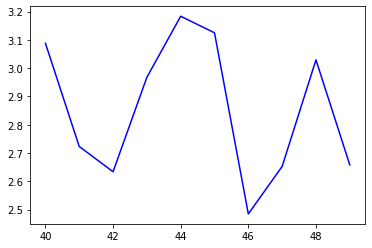

In [23]:
# without eva, angle = 40 - 50
step = 1 
angles = np.arange(40, 50, step)
result_without_eva = []
for angle in angles:
    measure_A, measure_B = measurements(eva=False, attempts=200, angle=angle)
    bell = bell_inequality(measure_A, measure_B)
    result_without_eva.append(bell)
mean_without_eva = np.mean(result_without_eva)
print("value: "+str(mean_without_eva.real))
plt.plot(angles, result_without_eva, color='blue')
plt.show()

value: 0.9526235202270075


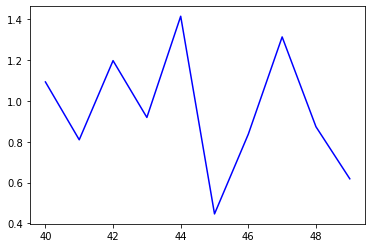

In [24]:
# with eva, angle = 40 - 50
step = 1 
angles = np.arange(40, 50, step)
result_with_eva = []
for angle in angles:
    measure_A, measure_B = measurements(eva=True, attempts=200, angle=angle)
    bell = bell_inequality(measure_A, measure_B)
    result_with_eva.append(bell)
mean_with_eva = np.mean(result_with_eva)
print("value: "+str(mean_with_eva.real))
plt.plot(angles, result_with_eva, color='blue')
plt.show()